In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
%load_ext autoreload
%autoreload 2
from fuzzytools.files import get_roodirs

rootdir = '../save'
kf = '.'
mode = 'fine-tuning'
method = 'spm-mcmc-estw'

cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
roodirs = get_roodirs(rootdir)
model_names = [r.split('/')[-1] for r in roodirs if '~' in r] # patch
model_names

['mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g28-g28-g28.r28-r28-r28~dec-emb=g28-g28-g28.r28-r28-r28~b=1024~bypass=0']

No handles with labels found to put in legend.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ids=['0@id=1000'](n=1#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g28-g28-g28.r28-r28-r28~dec-emb=g28-g28-g28.r28-r28-r28~b=1024~bypass=0


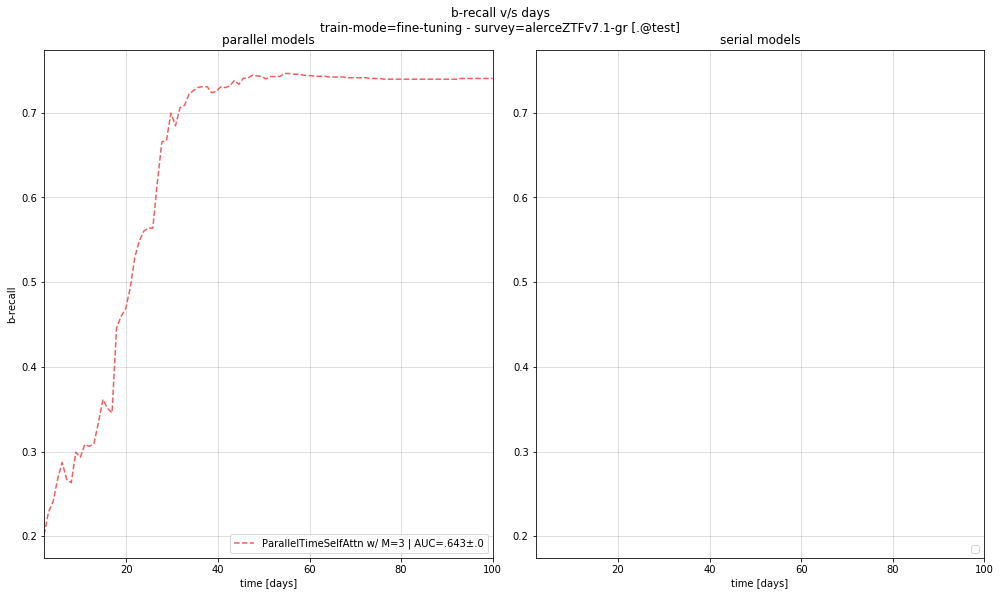

No handles with labels found to put in legend.


ids=['0@id=1000'](n=1#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=6~enc-emb=g28-g28-g28.r28-r28-r28~dec-emb=g28-g28-g28.r28-r28-r28~b=1024~bypass=0


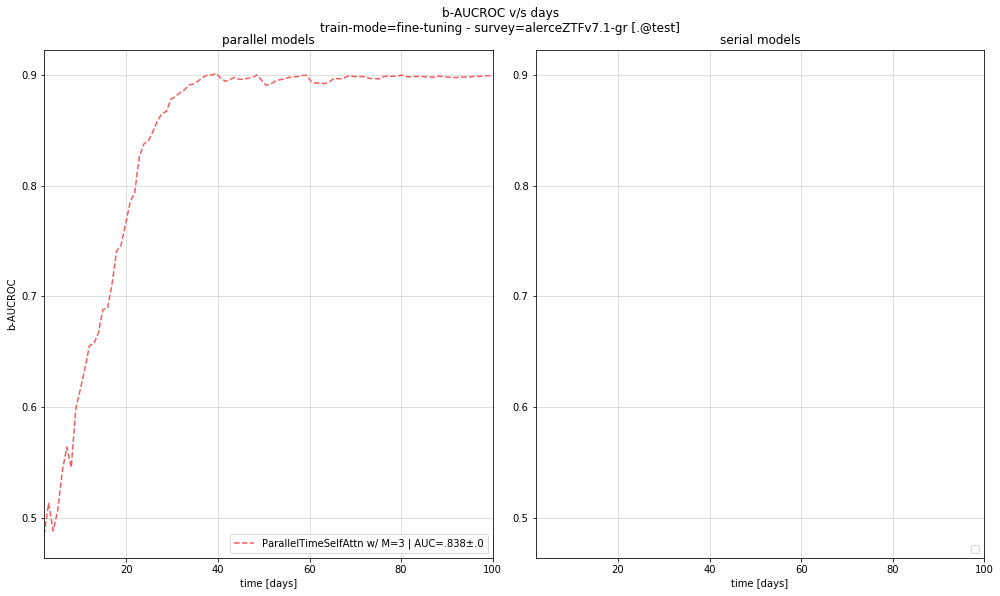

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from lcclassifier.results.plots import plot_metric

lcset_name = 'test'
label_keys = [
    'cell',
    'aggr',
    'te-dims',
    'bypass',
    'b',
]
dmetrics = {
    #f'b-precision':{'k':1, 'mn':None},
    f'b-recall':{'k':1, 'mn':None},
    #f'b-f1score':{'k':1, 'mn':None},
    f'b-rocauc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-prauc':{'k':1, 'mn':'b-AUCPR'},
    }
kwargs = {
    'label_keys':label_keys,
    #'baselines_dict':baselines_dict,
    'p':None, # 5 None
}
plot_metric(rootdir, cfilename, kf, lcset_name, model_names, dmetrics, **kwargs)

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_parallel_serial_df
from fuzzytools.latex.latex_tables import LatexTable

dmetrics = {
    f'b-precision':{'k':1, 'mn':None},
    f'b-recall':{'k':1, 'mn':None},
    f'b-f1score':{'k':1, 'mn':None},
    f'b-rocauc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-prauc':{'k':1, 'mn':'b-AUCPR'},
    }
kwargs = {
    'uses_avg':1,
    'day':100,
    #'override_model_name':False, # False True
    'label_keys':label_keys,
    'baseline_filedir':f'../temp/baseline~mode=all.df',
    }
info_df = get_parallel_serial_df(rootdir, cfilename, kf, lcset_name, model_names, dmetrics, **kwargs)
display(info_df())

caption = ''
caption += f'Baseline method v/s deep learning models.'
latex_kwargs = {
    'caption':caption,
    'label':'?',
    'bold_axis':'columns',
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_cm

label_keys = [
    'cell',
    'aggr',
    'te-dims',
]
lcset_name = 'test'
kwargs = {
    'label_keys':label_keys,
    'export_animation':False, # False True
}
plot_cm(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_temporal_encoding

label_keys = [
    'cell',
    'aggr',
    'te-dims',
]
lcset_name = f'train.{method}'
kwargs = {
    'label_keys':label_keys,
}
plot_temporal_encoding(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.times import get_times_df

kwargs = {
    'label_keys':label_keys,
    }
info_df = get_times_df(rootdir, cfilename, kf, method, model_names, **kwargs)
info_df